In [1]:
# Install if not already installed
!pip install mlxtend pandas openpyxl networkx

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# Load Excel file and pick the cleaned sheet
file_path = "Data untuk Analisis Korelasi.xlsx"
df = pd.read_excel(file_path, sheet_name="Correlation (latest)")

# Preview first few rows
df.head()

,Tarikh,Suhu (Celcius),Range Suhu (Celcius),Suhu 23-26,Suhu 26-29,Suhu 29-32,Kelembapan (%),Range Kelembapan (%),Kelembapan 58-71,Kelembapan 71-84,...,Sakit dada,Berkahak,Hilang selera makan,Menggigil,Sakit perut,Mual,Sakit otot,Sakit mata,Lain-lain,Komorbiditi
0,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.0,58--71,Ya,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,darah tinggi
1,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.0,58--71,Ya,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,"darah tinggi, kencing manis"
2,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.0,58--71,Ya,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,tiada
3,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.0,58--71,Ya,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,tiada
4,2021-10-01,28.429,26--29,Tidak,Ya,Tidak,69.0,58--71,Ya,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,tiada


In [4]:
# Select only categorical "Ya"/"Tidak" columns
binary_cols = [col for col in df.columns if df[col].isin(["Ya", "Tidak"]).any()]

# Convert to binary format (1 = Yes, 0 = No)
df_bin = df[binary_cols].replace({"Ya": 1, "Tidak": 0})

df_bin.head()

C:\Users\ainaa\AppData\Local\Temp\ipykernel_15012\3103049145.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bin = df[binary_cols].replace({"Ya": 1, "Tidak": 0})


,Suhu 23-26,Suhu 26-29,Suhu 29-32,Kelembapan 58-71,Kelembapan 71-84,Kelembapan 84-97,Kelajuan Angin 1-5,Kelajuan Angin 5-9,Kelajuan Angin 9-13,Demam,...,Hidung tersumbat,Sakit dada,Berkahak,Hilang selera makan,Menggigil,Sakit perut,Mual,Sakit otot,Sakit mata,Lain-lain
0,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df_bin, min_support=0.05, use_colnames=True)

# Show frequent patterns
frequent_itemsets.sort_values(by="support", ascending=False).head(10)

c:\Users\ainaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.823925,(Suhu 26-29)
3,0.714359,(Kelembapan 71-84)
15,0.685366,"(Kelembapan 71-84, Suhu 26-29)"
6,0.583932,(Kelajuan Angin 5-9)
7,0.454685,(Demam)
18,0.447849,"(Kelajuan Angin 5-9, Suhu 26-29)"
34,0.389550,"(Kelembapan 71-84, Kelajuan Angin 5-9)"
8,0.382007,(Batuk)
19,0.376154,"(Demam, Suhu 26-29)"
5,0.369161,(Kelajuan Angin 1-5)


In [6]:
# Generate rules with minimum confidence 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort by Lift (higher = stronger association)
rules_sorted = rules.sort_values(by="lift", ascending=False)

# Display top 15 rules
rules_sorted.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
74,"(Suhu 26-29, Hilang deria bau)",(Hilang deria rasa),0.082577,0.080377,0.052367,0.634158,7.889780,1.0,0.045730,2.513716,0.951855,0.473535,0.602183,0.642837
75,(Hilang deria rasa),"(Suhu 26-29, Hilang deria bau)",0.080377,0.082577,0.052367,0.651515,7.889780,1.0,0.045730,2.632605,0.949578,0.473535,0.620148,0.642837
30,(Hilang deria bau),(Hilang deria rasa),0.102220,0.080377,0.064349,0.629516,7.832025,1.0,0.056133,2.482219,0.971640,0.544186,0.597135,0.715051
29,(Hilang deria rasa),(Hilang deria bau),0.080377,0.102220,0.064349,0.800587,7.832025,1.0,0.056133,4.502105,0.948562,0.544186,0.777882,0.715051
72,"(Suhu 26-29, Hilang deria rasa)",(Hilang deria bau),0.065724,0.102220,0.052367,0.796772,7.794711,1.0,0.045649,4.417608,0.933030,0.453093,0.773633,0.654535
76,"(Kelajuan Angin 5-9, Kelembapan 58-71)",(Suhu 29-32),0.143272,0.136005,0.101787,0.710447,5.223694,1.0,0.082302,2.983893,0.943783,0.573484,0.664867,0.729429
80,(Suhu 29-32),"(Kelajuan Angin 5-9, Kelembapan 58-71)",0.136005,0.143272,0.101787,0.748411,5.223694,1.0,0.082302,3.405271,0.935844,0.573484,0.706338,0.729429
79,(Kelembapan 58-71),"(Kelajuan Angin 5-9, Suhu 29-32)",0.157847,0.127048,0.101787,0.644848,5.075637,1.0,0.081733,2.457969,0.953485,0.555889,0.593160,0.723012
77,"(Kelajuan Angin 5-9, Suhu 29-32)",(Kelembapan 58-71),0.127048,0.157847,0.101787,0.801175,5.075637,1.0,0.081733,4.235649,0.919845,0.555889,0.763909,0.723012
13,(Suhu 29-32),(Kelembapan 58-71),0.136005,0.157847,0.107012,0.786828,4.984748,1.0,0.085544,3.950587,0.925223,0.572750,0.746873,0.732389


In [7]:
# Show only Antecedent, Consequent, Support, Confidence, Lift
rules_sorted[['antecedents','consequents','support','confidence','lift']].head(15)

,antecedents,consequents,support,confidence,lift
74,"(Suhu 26-29, Hilang deria bau)",(Hilang deria rasa),0.052367,0.634158,7.889780
75,(Hilang deria rasa),"(Suhu 26-29, Hilang deria bau)",0.052367,0.651515,7.889780
30,(Hilang deria bau),(Hilang deria rasa),0.064349,0.629516,7.832025
29,(Hilang deria rasa),(Hilang deria bau),0.064349,0.800587,7.832025
72,"(Suhu 26-29, Hilang deria rasa)",(Hilang deria bau),0.052367,0.796772,7.794711
76,"(Kelajuan Angin 5-9, Kelembapan 58-71)",(Suhu 29-32),0.101787,0.710447,5.223694
80,(Suhu 29-32),"(Kelajuan Angin 5-9, Kelembapan 58-71)",0.101787,0.748411,5.223694
79,(Kelembapan 58-71),"(Kelajuan Angin 5-9, Suhu 29-32)",0.101787,0.644848,5.075637
77,"(Kelajuan Angin 5-9, Suhu 29-32)",(Kelembapan 58-71),0.101787,0.801175,5.075637
13,(Suhu 29-32),(Kelembapan 58-71),0.107012,0.786828,4.984748


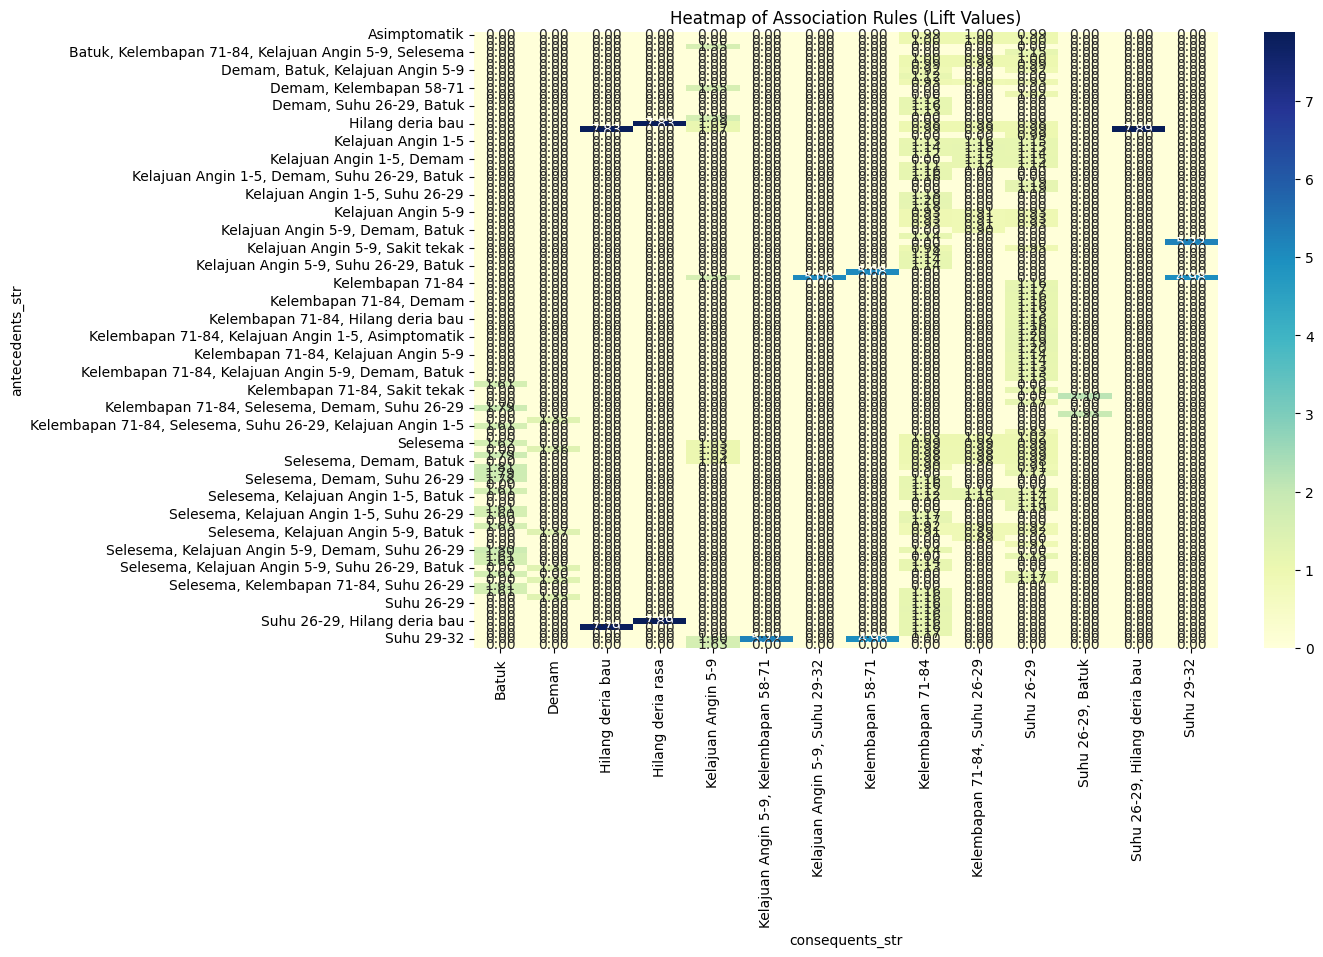

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert frozenset to string so pivot_table can work
rules_sorted['antecedents_str'] = rules_sorted['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_sorted['consequents_str'] = rules_sorted['consequents'].apply(lambda x: ', '.join(list(x)))

# Build pivot table
heatmap_data = rules_sorted.pivot_table(
    index="antecedents_str",
    columns="consequents_str",
    values="lift",
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Association Rules (Lift Values)")
plt.show()

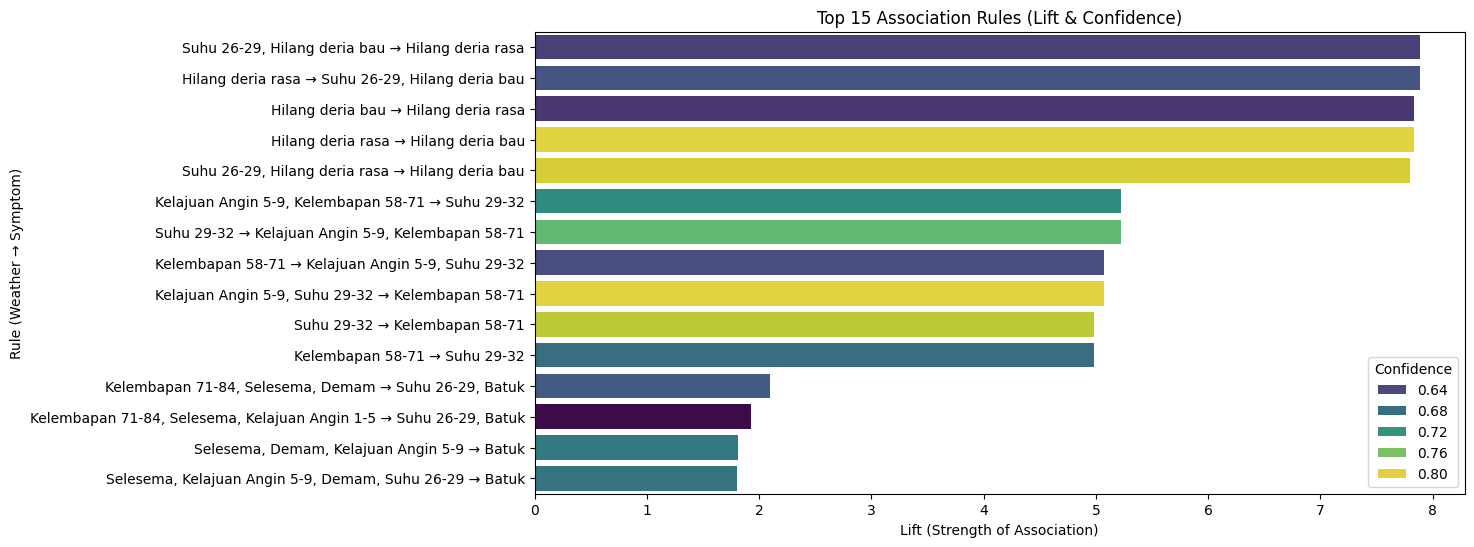

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take top 15 rules
top_rules = rules_sorted.head(15).copy()

# Create a readable label "Weather → Symptom"
top_rules['rule'] = top_rules['antecedents_str'] + " → " + top_rules['consequents_str']

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_rules,
    x="lift",
    y="rule",
    hue="confidence",
    dodge=False,
    palette="viridis"
)
plt.title("Top 15 Association Rules (Lift & Confidence)")
plt.xlabel("Lift (Strength of Association)")
plt.ylabel("Rule (Weather → Symptom)")
plt.legend(title="Confidence")
plt.show()

In [13]:
# Function to generate plain-language explanation for rules
def explain_rules(rules_df, top_n=10):
    explanations = []
    for _, row in rules_df.head(top_n).iterrows():
        antecedent = row['antecedents_str']
        consequent = row['consequents_str']
        support = round(row['support'] * 100, 2)   # convert to %
        confidence = round(row['confidence'] * 100, 2)  # convert to %
        lift = round(row['lift'], 2)

        explanation = (
            f"When {antecedent} occurs, patients are more likely to report {consequent}. "
            f"This rule has a support of {support}%, meaning it appears in {support}% of cases. "
            f"The confidence is {confidence}%, meaning it is correct {confidence}% of the time. "
            f"The lift is {lift}, meaning {consequent} is {lift}× more likely than random chance "
            f"when {antecedent} is present."
        )
        explanations.append(explanation)
    
    return explanations

# Generate explanations for top 10 rules
explanations = explain_rules(rules_sorted, top_n=10)

# Print nicely
for i, exp in enumerate(explanations, 1):
    print(f"{i}. {exp}\n")


1. When Suhu 26-29, Hilang deria bau occurs, patients are more likely to report Hilang deria rasa. This rule has a support of 5.24%, meaning it appears in 5.24% of cases. The confidence is 63.42%, meaning it is correct 63.42% of the time. The lift is 7.89, meaning Hilang deria rasa is 7.89× more likely than random chance when Suhu 26-29, Hilang deria bau is present.

2. When Hilang deria rasa occurs, patients are more likely to report Suhu 26-29, Hilang deria bau. This rule has a support of 5.24%, meaning it appears in 5.24% of cases. The confidence is 65.15%, meaning it is correct 65.15% of the time. The lift is 7.89, meaning Suhu 26-29, Hilang deria bau is 7.89× more likely than random chance when Hilang deria rasa is present.

3. When Hilang deria bau occurs, patients are more likely to report Hilang deria rasa. This rule has a support of 6.43%, meaning it appears in 6.43% of cases. The confidence is 62.95%, meaning it is correct 62.95% of the time. The lift is 7.83, meaning Hilang 

In [11]:
import json

# Select only the needed columns
rules_export = rules_sorted[['antecedents_str','consequents_str','support','confidence','lift']]

# Convert to JSON and save
rules_json = rules_export.to_dict(orient="records")
with open("arm_rules.json", "w") as f:
    json.dump(rules_json, f, indent=4)

print("✅ ARM rules exported to arm_rules.json")

✅ ARM rules exported to arm_rules.json
